In [1]:
import qckt
from QSystems import *
from Job import Job
import Registers as regs


In [2]:
nq = 9

s = [0, 1, 2]  # sum bits - Result of addition
c = [3, 4]     # carry bits, scratch pad register - Junk bits
b = [5, 6]     # input number B
a = [7, 8]     # input number A

In [3]:
addckt = qckt.QCkt(nq, nq)

addckt.H(a[0])
addckt.H(a[1])
addckt.H(b[0])
addckt.H(b[1])

# run the addition 
for i in range(2):
    # print("Processing bit", i)
    addckt.CX(a[i],s[i])
    addckt.CX(b[i],s[i])
    if i != 0:
        addckt.CX(c[i-1],s[i])
    addckt.CCX(a[i],b[i],c[i])
    if i != 0:
        addckt.X(s[i])
        addckt.CCX(s[i],c[i-1],c[i])
        addckt.X(s[i])
addckt.CX(c[1],s[2])

# Clean up the junk bits
for i in reversed(range(2)):
    if i != 0:
        addckt.X(s[i])
        addckt.CCX(s[i],c[i-1],c[i])
        addckt.X(s[i])
    addckt.CCX(a[i],b[i],c[i])
addckt.M([2,1,0])
# addckt.M([5,6,7,8],[5,6,7,8])

addckt.draw()

q000 -----------------[X]-[X]-----------------------------------------------------------------[M]-
                       |   |                                                                   |  
q001 ------------------|---|------[X]-[X]-[X]-----[X]-[.]-[X]-----[X]-[.]-[X]-------------[M]--|--
                       |   |       |   |   |           |               |                   |   |  
q002 ------------------|---|-------|---|---|-----------|------[X]------|--------------[M]--|---|--
                       |   |       |   |   |           |       |       |               |   |   |  
q003 ------------------|---|--[X]--|---|--[.]---------[.]------|------[.]---------[X]--|---|---|--
                       |   |   |   |   |               |       |       |           |   |   |   |  
q004 ------------------|---|---|---|---|------[X]-----[X]-----[.]-----[X]-----[X]--|---|---|---|--
                       |   |   |   |   |       |                               |   |   |   |   |  
q005 -----

In [7]:
job = Job(addckt,shots=100, qtrace=False, verbose=False)
bk = Qeng()
bk.runjob(job)

In [8]:
print()
print("READ OUT STATE VECTOR: ")
print(job.get_svec())
print("READ OUT CREGISTER: ", end="")
print(job.get_creg()[0])
print()
print('READ OUT RUNSTATS')
job.print_runstats()


READ OUT STATE VECTOR: 
None
READ OUT CREGISTER: 000000001

READ OUT RUNSTATS
Total Ops  :    21      operations
Total Time :     0.9950 sec
Per Operation:
    H           0.1989 sec     4 times 0.0497 avg
    CX          0.2945 sec     6 times 0.0491 avg
    CCX         0.2947 sec     6 times 0.0491 avg
    X           0.1952 sec     4 times 0.0488 avg
    MEASURE     0.0117 sec     1 times 0.0117 avg


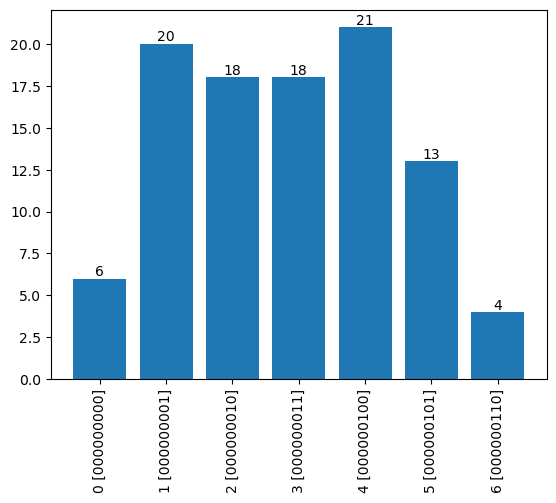

In [9]:
_ = job.plot_counts()